### С помощью алгоритма PCA найти размерность пространства признаков до которой можно понизить исходное пространство без потери точности.

Датасет: https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy.stats import shapiro
from scipy.stats import normaltest

## Вспомогательные функции

In [3]:
## Просмотр данных
def prosmotr(data):
  pd.set_option('display.max_columns', 100) #Размеры таблицы
  pd.set_option('display.max_rows', 100)
  pd.set_option('precision', 2) #Регулируем количество знаков после запятой:
  print('~~~~Содержание данных~~~~\n', data.head())
  print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
  print('~~~Размеры данных~~~\n', data.shape)
  print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
  print('~~~Названия колонок~~~\n', data.columns)
  print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
  print('~~~Информация о данных~~~\n')
  print(data.info())
  print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
  print('~~~Наличие пропусков в данных~~~\n', data.isna().sum())
  print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
  print('~~~Количество типов в данных~~~')
  print(data.dtypes.value_counts())
  print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
  kateg = list(data.select_dtypes(include=['object']).columns) # Делаем список категориальных данных
  print('~~~Категориальные данные~~~~')
  print(kateg)
  print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
  chislov_float = list(data.select_dtypes(include=['float64'])) #Делаем список числовых данных float
  print('~~~Числове данные float~~~~')
  print(chislov_float)
  print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
  chislov_int = list(data.select_dtypes(include=['int64'])) #Делаем список числовых данных int
  print('~~~Числове данные int~~~~')
  print(chislov_int)
  print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
  print('~~~Основные статистические характеристики данных по каждому числовому признаку (типы int64)~~~\n', data.describe(include=['int64']))
  print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
  print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
  print('~~~Основные статистические характеристики данных по каждому числовому признаку (типы float64)~~~\n', data.describe(include=['float64']))
  print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
  

In [4]:
## Анализ данных
def analyze(data):
  num = data.columns
  for i in num:
    print(i.title())
    print('~~~~~~~~~~~~~~~~~~~~~~~~~\n')
    print("mean : ", np.mean(data[i]))
    print("var  : ", np.var(data[i]))
    print("skew : ", skew(data[i]))
    print("kurt : ", kurtosis(data[i]))
    print("shapiro : ", shapiro(data[i]))
    print("normaltest : ", normaltest(data[i]))
    print('~~~~~~~~~~~~~~~~~~~~~~~~~')
    print('~~~~~~~~~~~~~~~~~~~~~~~~~\n')

## Загружаем данные

In [5]:
file = files.upload()

Saving winequality-red.csv to winequality-red.csv


In [6]:
df = pd.read_csv('winequality-red.csv')

In [7]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
prosmotr(df)

~~~~Содержание данных~~~~
    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9       0.08   
1            7.8              0.88         0.00             2.6       0.10   
2            7.8              0.76         0.04             2.3       0.09   
3           11.2              0.28         0.56             1.9       0.07   
4            7.4              0.70         0.00             1.9       0.08   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0      1.0  3.51       0.56   
1                 25.0                  67.0      1.0  3.20       0.68   
2                 15.0                  54.0      1.0  3.26       0.65   
3                 17.0                  60.0      1.0  3.16       0.58   
4                 11.0                  34.0      1.0  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8     

In [9]:
analyze(df)

Fixed Acidity
~~~~~~~~~~~~~~~~~~~~~~~~~

mean :  8.319637273295838
var  :  3.0295205688671296
skew :  0.9818292953262073
kurt :  1.1248563352037486
shapiro :  (0.942030668258667, 1.5255951637239901e-24)
normaltest :  NormaltestResult(statistic=224.53087840457746, pvalue=1.7528277735470436e-49)
~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~

Volatile Acidity
~~~~~~~~~~~~~~~~~~~~~~~~~

mean :  0.5278205128205131
var  :  0.03204232613332036
skew :  0.6709623963499574
kurt :  1.2179633893005306
shapiro :  (0.9743340611457825, 2.686806772838566e-16)
normaltest :  NormaltestResult(statistic=143.4193435598286, pvalue=7.192589039756692e-32)
~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~

Citric Acid
~~~~~~~~~~~~~~~~~~~~~~~~~

mean :  0.2709756097560964
var  :  0.037923751124940605
skew :  0.3180385895475358
kurt :  -0.7902825153036646
shapiro :  (0.9552900195121765, 1.0208196357632134e-21)
normaltest :  NormaltestResult(statistic=152.039214793795, pvalue=9.662822259281018e-34)
~~~~~~

In [10]:
y =df['quality']
x = df.drop(['quality'], axis=1)

In [11]:
x.shape

(1599, 11)

Text(0.5, 1.0, 't-SNE')

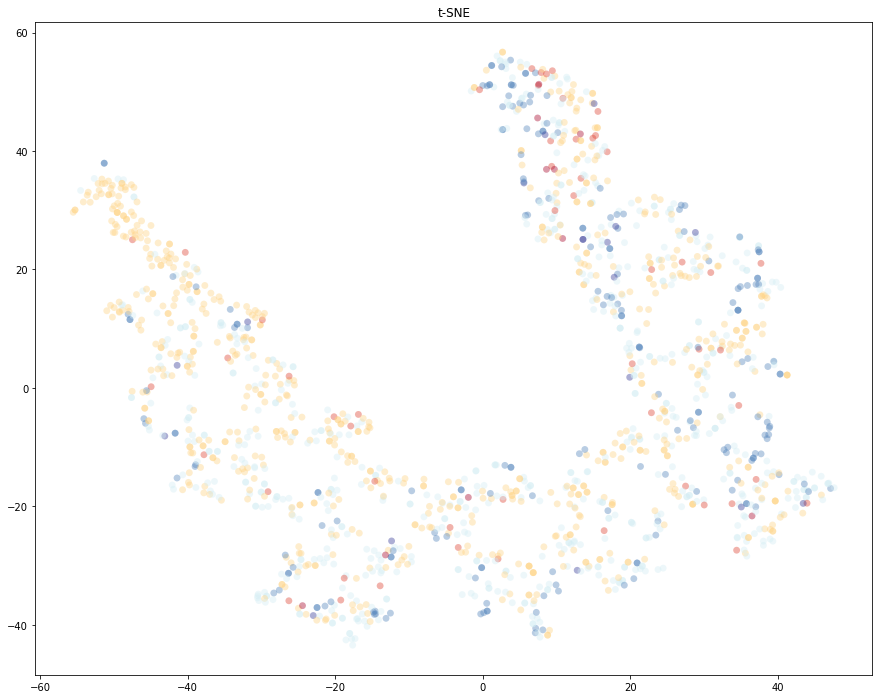

In [12]:
from sklearn.manifold import TSNE
ts = TSNE(random_state=47)
x_ts = ts.fit_transform(x)
plt.figure(figsize=(15,12))
plt.scatter(x_ts[:, 0], x_ts[:, 1], c=y, edgecolor='none', alpha=0.4, s=47, cmap=plt.cm.get_cmap('RdYlBu', 9))
plt.title('t-SNE')

In [13]:
from sklearn import decomposition

# Прогоним встроенный в sklearn PCA
pca = decomposition.PCA()
x_centered = x - x.mean(axis=0)
pca.fit(x_centered)


PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [14]:
np.cumsum(pca.explained_variance_ratio_)

array([0.94657698, 0.99494528, 0.99753445, 0.99905342, 0.99992697,
       0.99996154, 0.9999809 , 0.99999037, 0.99999878, 1.        ,
       1.        ])

In [15]:
n=1
pca = decomposition.PCA(n_components=n)
pcar = pca.fit_transform(x)
print('Основных фич:',n,'Точность:{}'.format(np.sum(pca.explained_variance_ratio_)))
print('Размерность пространства признаков до которой можно понизить исходное пространство почти без потери точности =', n)

Основных фич: 1 Точность:0.9465769763954636
Размерность пространства признаков до которой можно понизить исходное пространство почти без потери точности = 1


##  95 процентов это приемлимая точность и значит можно спроецировать на одну компонету

Text(0.5, 1.0, 'WINE. t-SNE-pca projection')

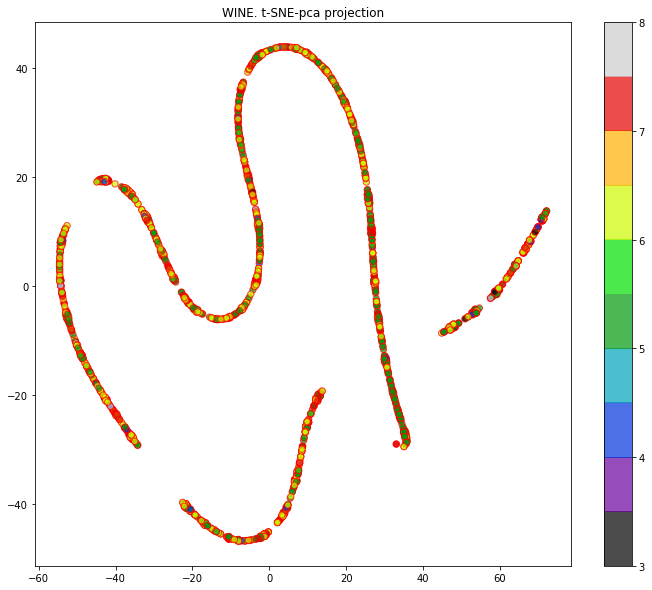

In [16]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=17)

X_tsne = tsne.fit_transform(pcar)

plt.figure(figsize=(12,10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, 
            edgecolor='red', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('WINE. t-SNE-pca projection')

In [17]:
X=pd.DataFrame(pcar, columns = ['pca_best_vector']) 

In [18]:
from sklearn import metrics
from sklearn import datasets
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, SpectralClustering,DBSCAN

In [19]:
XX=pd.DataFrame(pcar, columns = ['pca_best_vector']) 
XXX=x
yy=y
X=XX

## K-means

In [20]:
for n in  [5,6,7,8,9]:
  al = KMeans(n_clusters=n, random_state=47)
  al.fit(X)
  print( n, metrics.silhouette_score(X, al.labels_))

5 0.5690905472416553
6 0.5721868648698748
7 0.5576548107634687
8 0.5576846216426149
9 0.5523385255874895


## AgglomerativeClustering

In [21]:
for n in  [5,6,7,8,9]:
  al = AgglomerativeClustering(n_clusters=n)
  al.fit(X)
  print(n,metrics.silhouette_score(X, al.labels_))


5 0.5033067289580442
6 0.5071106186490495
7 0.5114510936393273
8 0.5296263172519802
9 0.5242506293074017


In [22]:
X=XXX

## K-means 2

In [23]:
for n in  [5,6,7,8,9]:
  algo = KMeans(n_clusters=n, random_state=1)
  algo.fit(X)
  print(n,metrics.silhouette_score(X, algo.labels_))

5 0.44598478977367045
6 0.44850222651946337
7 0.3950242035142624
8 0.39123406834035
9 0.38711048052450053


## AgglomerativeClustering 2

In [24]:
for n in  [5,6,7,8,9]:
  algo = AgglomerativeClustering(n_clusters=n)
  algo.fit(X)
  print(n,metrics.silhouette_score(X, algo.labels_))


5 0.41101924183058636
6 0.413733064213104
7 0.39516175482451915
8 0.33004322570957134
9 0.3293410626267649


## до которой можно понизить исходное пространство без потери точности около 5-6